In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import rasterio.features as features
from rasterio.plot import show
import geopandas as gpd

<AxesSubplot:>

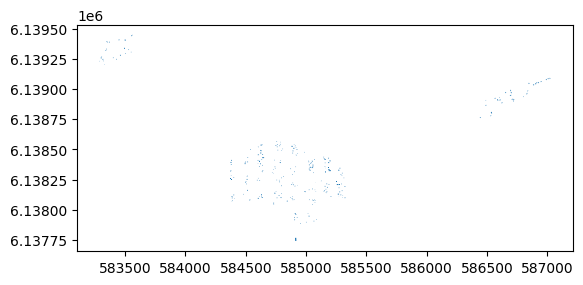

In [2]:
# Read in vector
vector = gpd.read_file("input_vector_data/labels.geojson")

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

vector.plot()

In [3]:
input_tif = 'images/overlap/J-29-C-5-M-9.jpg'

raster = rasterio.open(input_tif)

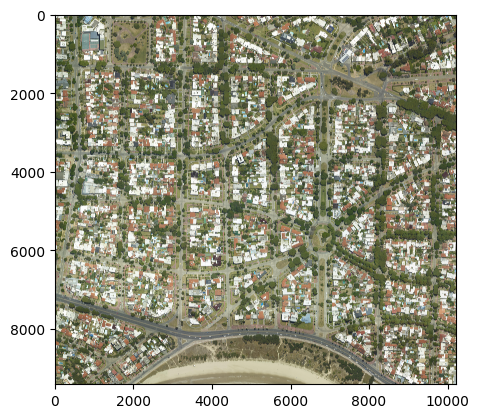

In [4]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(raster.read(1))
greenn = normalize(raster.read(2))
bluen = normalize(raster.read(3))

rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)

In [5]:
metadata = raster.meta.copy()
metadata

{'driver': 'JPEG',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 10223,
 'height': 9411,
 'count': 3,
 'crs': CRS.from_epsg(32721),
 'transform': Affine(0.1, 0.0, 584006.8766699999,
        0.0, -0.1, 6138819.79242)}

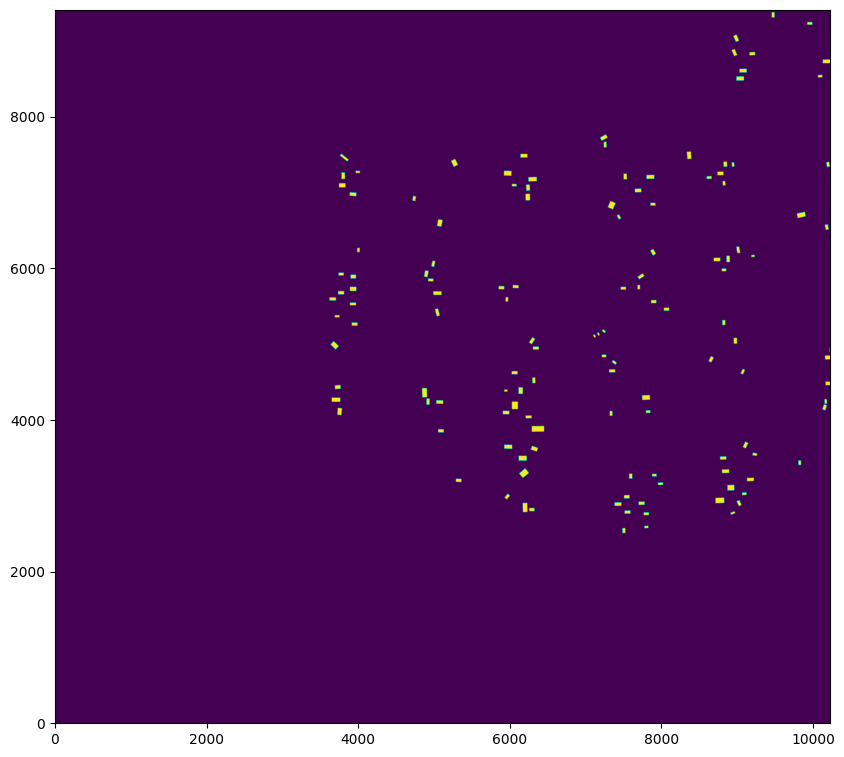

In [6]:
# Rasterize vector using the shape and coordinate system of the raster
rasterized = features.rasterize(
    geom,
    out_shape = raster.shape,
    fill = 0,
    out = None,
    transform = raster.transform,
    all_touched = False,
    default_value = 1,
    dtype = None)

# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

In [7]:
vector = gpd.read_file("input_vector_data/labels.geojson")
geom = [shapes for shapes in vector.geometry]

def generate_mask(input_image, labels, output_image):
    raster = rasterio.open(input_image)
    metadata = raster.meta.copy()

    rasterized = features.rasterize(
        geom,
        out_shape = raster.shape,
        fill = 0,
        out = None,
        transform = raster.transform,
        all_touched = False,
        default_value = 255,
        dtype = None)
    
    if np.sum(rasterized)==0:
        print(f'No intersection between {input_image} and vector')

    new_dataset = rasterio.open(
        output_image,
        'w',
        driver='JPEG',
        height=rasterized.shape[0],
        width=rasterized.shape[1],
        nodata=0,
        count=1,
        dtype=str(rasterized.dtype),
        crs=metadata['crs'],
        transform=metadata['transform'])

    new_dataset.write(rasterized, 1)
    new_dataset.close()
    print(f'Saved image to {output_image}')

In [8]:
input_images = [f'images/overlap/tiles/{img}' for img in os.listdir('images/overlap/tiles') if img.endswith('.jpg')]
print(f'Input images list is {len(input_images)} length.')
output_images = [f'images/overlap/masks/{os.path.basename(img)}' for img in input_images]

Input images list is 521 length.


In [9]:
if not os.path.isdir('images/overlap/masks'):
    os.makedirs('images/overlap/masks')
    print('Directory was created')
else:
    print('Directory already exists')

Directory was created


In [10]:
for input_img, output_img in zip(input_images, output_images):
    generate_mask(input_img, geom, output_img)

No intersection between images/overlap/tiles/J-29-C-5-N-5_302.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_302.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_339.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_339.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_280.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_99.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_99.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_139.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_115.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_115.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_66.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_66.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_85.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_268.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_268.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_302.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_339.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_280.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_99.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_139.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_115.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_66.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_85.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_268.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-7_9.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_9.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_286.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_286.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_186.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_186.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_371.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_371.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_257.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_126.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_49.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_49.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_68.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_35.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_9.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_286.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_186.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_371.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_257.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_126.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_49.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_68.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_35.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-5_118.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_376.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_376.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_210.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_210.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_375.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_101.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_101.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_332.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_157.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_157.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_121.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_121.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_0.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-5_118.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_376.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_210.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_375.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_101.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_332.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_157.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_121.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_0.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_187.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_187.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_245.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_245.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_41.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_41.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_125.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_125.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_128.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_128.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_130.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_130.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_200.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_200.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_144.jpg
No inte

ERROR 4: images/overlap/masks/J-29-C-5-M-9_187.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_245.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_41.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_125.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_128.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_130.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_200.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_144.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-8_191.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_141.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_378.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_375.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_375.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_2.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_2.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_255.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_255.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_145.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_230.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_230.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-8_191.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_141.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_378.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_375.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_2.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_255.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_145.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_230.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-5_224.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_224.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_265.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_265.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_203.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_203.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_81.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_159.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_159.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_290.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_290.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_249.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_249.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_224.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_265.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_203.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_81.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_159.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_290.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_249.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_216.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_347.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_347.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_70.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_70.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_6.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_138.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_61.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_61.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_229.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_229.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_323.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_323.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_216.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_347.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_70.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_6.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_138.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_61.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_229.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_323.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-O-3_209.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_209.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_283.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_283.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_284.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_284.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_24.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_24.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_220.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_46.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_70.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_70.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_267.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_267.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_371.jpg and vector


ERROR 4: images/overlap/masks/J-29-C-5-O-3_209.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_283.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_284.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_24.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_220.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_46.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_70.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_267.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_371.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-5_371.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_128.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_128.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_14.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_14.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_276.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_319.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_319.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_119.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_119.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_120.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_120.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_172.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_172.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_11.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_128.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_14.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_276.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_319.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_119.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_120.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_172.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_11.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_104.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-6_104.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_104.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_75.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_75.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_86.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_261.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_261.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_357.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_357.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_237.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_333.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_295.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_75.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_86.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_261.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_357.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_237.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_333.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_295.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_80.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-5_80.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_80.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_122.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_122.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_308.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_308.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_161.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_161.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_161.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_161.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_68.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_182.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_114.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_114.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_122.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_308.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_161.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_161.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_68.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_182.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_114.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_287.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-O-3_287.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_287.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_141.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_141.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_356.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_356.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_227.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_227.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_69.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_207.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_207.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_143.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_104.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-5_141.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_356.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_227.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_69.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_207.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_143.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_104.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_67.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-7_67.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_67.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_142.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_363.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_363.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_336.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_364.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_364.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_226.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_335.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_335.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_14.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_14.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_142.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_363.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_336.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_364.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_226.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_335.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_14.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_290.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_228.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_290.jpg
Saved image to images/overlap/masks/J-29-C-5-N-8_228.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_299.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_362.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_242.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_285.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_285.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_244.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_244.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_174.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_174.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_60.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_60.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_299.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_362.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_242.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_285.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_244.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_174.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_60.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_314.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_23.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_314.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_314.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_23.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_23.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_67.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_240.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_240.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_148.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_148.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_33.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_33.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_47.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_47.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_223.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_223.jpg
Saved image 

ERROR 4: images/overlap/masks/J-29-C-5-N-6_67.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_240.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_148.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_33.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_47.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_223.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_281.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_168.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_168.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_168.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_256.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_53.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_124.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_124.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_367.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_30.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_30.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_4.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_316.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_122.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_256.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_53.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_124.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_367.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_30.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_4.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_316.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_122.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_39.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-P-1_39.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_162.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_162.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_105.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_318.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_343.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_117.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_117.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_326.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_326.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_365.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_365.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_162.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_105.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_318.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_343.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_117.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_326.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_365.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_12.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_137.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-6_12.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_12.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_137.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_204.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_82.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_230.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_230.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_142.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_278.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_317.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_62.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_62.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_204.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_82.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_230.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_142.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_278.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_317.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_62.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_69.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-6_69.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_69.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_33.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_33.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_328.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_82.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_82.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_227.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_227.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_289.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_289.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_271.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_66.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_66.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-6_33.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_328.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_82.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_227.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_289.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_271.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_66.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_352.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_125.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_352.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_352.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_125.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_125.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_338.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_338.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_45.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_319.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_319.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_355.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_299.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_127.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_127.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_338.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_45.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_319.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_355.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_299.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_127.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_279.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_140.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_279.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_140.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_330.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_1.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_334.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_334.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_160.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_160.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_3.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_3.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_270.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_260.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_260.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_330.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_1.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_334.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_160.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_3.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_270.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_260.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_293.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_58.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_293.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_58.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_163.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_163.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_215.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_101.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_101.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_62.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_62.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_166.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_166.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_282.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_282.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_175.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_163.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_215.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_101.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_62.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_166.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_282.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_175.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_208.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_350.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_208.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_208.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_350.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_350.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_28.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_354.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_30.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_320.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_320.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_377.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_303.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_303.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_88.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_88.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_28.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_354.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_30.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_320.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_377.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_303.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_88.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_302.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_125.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_302.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_302.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_125.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_40.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_40.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_88.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_25.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_249.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_249.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_105.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_105.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_226.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_226.jpg


ERROR 4: images/overlap/masks/J-29-C-5-P-1_40.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_88.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_25.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_249.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_105.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_226.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_27.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_298.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_329.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-7_27.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_298.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_329.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_329.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_212.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_212.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_17.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_334.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_246.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_246.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_178.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_266.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_266.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-8_212.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_17.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_334.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_246.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_178.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_266.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_195.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_160.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_87.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_195.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_195.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_160.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_160.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_87.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_258.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_258.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_245.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_245.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_353.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_206.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_206.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_370.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_264.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_264.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_258.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_245.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_353.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_206.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_370.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_264.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_167.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_243.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_85.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_167.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_167.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_243.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_243.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_85.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_85.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_65.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_65.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_359.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_297.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_56.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_56.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_66.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_66.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_65.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_359.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_297.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_56.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_66.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_251.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_262.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_74.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_361.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_251.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_251.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_262.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_262.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_74.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_361.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_357.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_357.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_244.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_244.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_312.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_312.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_247.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_247.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_357.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_244.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_312.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_247.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_178.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_196.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_31.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_309.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_46.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-5_178.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_178.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_196.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_31.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_309.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_309.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_46.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_46.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_252.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_252.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_63.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_63.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_169.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_169.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_206.jpg and vector
Saved imag

ERROR 4: images/overlap/masks/J-29-C-5-M-9_252.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_63.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_169.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_206.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_102.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_4.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_205.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_348.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_133.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-5_102.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_4.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_4.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_205.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_205.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_348.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_133.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_133.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_369.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_263.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_263.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_354.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_354.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_124.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_124.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_369.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_263.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_354.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_124.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_308.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_131.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_331.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_8.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_358.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_308.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_308.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_131.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_131.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_331.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_8.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_8.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_358.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_358.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_5.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_5.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_280.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_239.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_239.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_291.jpg and vector
Saved image t

ERROR 4: images/overlap/masks/J-29-C-5-N-7_5.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_280.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_239.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_291.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_7.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_150.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_243.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_313.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_266.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-7_7.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_150.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_150.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_243.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_313.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_266.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_266.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_19.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_158.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_158.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_298.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_106.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_106.jpg


ERROR 4: images/overlap/masks/J-29-C-5-P-1_19.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_158.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_298.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_106.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_253.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_272.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_235.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_253.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_253.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_272.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_235.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_15.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_15.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_241.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_355.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_355.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_185.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_185.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_5.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_5.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-6_15.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_241.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_355.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_185.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_5.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_248.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_281.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_242.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-8_248.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_248.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_281.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_281.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_242.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_87.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_87.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_248.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_248.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_297.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_315.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_149.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_149.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_356.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_356.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-6_87.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_248.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_297.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_315.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_149.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_356.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_270.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_225.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_322.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-O-3_270.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_270.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_225.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_322.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_322.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_190.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_190.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_277.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_20.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_191.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_191.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_236.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_305.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_305.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-8_190.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_277.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_20.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_191.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_236.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_305.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_223.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_315.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_323.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_223.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_315.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_315.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_323.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_373.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_152.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_152.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_141.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_141.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_269.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_269.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_42.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_42.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_13.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_13.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_373.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_152.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_141.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_269.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_42.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_13.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_321.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_18.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_71.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_321.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_321.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_18.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_71.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_197.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_372.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_372.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_207.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_207.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_340.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_328.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_328.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_129.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_129.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_197.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_372.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_207.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_340.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_328.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_129.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_201.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_199.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_344.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_201.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_201.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_199.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_199.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_344.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_104.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_104.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_57.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_57.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_232.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_232.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_164.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_164.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_353.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_353.jpg
No inte

ERROR 4: images/overlap/masks/J-29-C-5-M-5_104.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_57.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_232.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_164.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_353.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_286.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_24.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_214.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_38.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-P-1_24.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_24.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_214.jpg
Saved image to images/overlap/masks/J-29-C-5-P-1_38.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_165.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_165.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_50.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_126.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_126.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_83.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_144.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_264.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_264.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_165.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_50.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_126.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_83.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_144.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_264.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_190.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_134.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_171.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-O-3_190.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_190.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_134.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_134.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_171.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_171.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_324.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_320.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_320.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_32.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_32.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_155.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_155.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_279.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_32.jpg


ERROR 4: images/overlap/masks/J-29-C-5-O-3_324.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_320.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_32.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_155.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_279.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_32.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_274.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_310.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_228.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_274.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_310.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_310.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_228.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_228.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_346.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_346.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_304.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_304.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_145.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_160.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_160.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_210.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_210.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_289.jpg and vector
Saved

ERROR 4: images/overlap/masks/J-29-C-5-O-3_346.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_304.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_145.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_160.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_210.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_289.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_327.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_55.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_307.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_327.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_327.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_55.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_307.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_307.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_136.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_136.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_246.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_246.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_233.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_318.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_265.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_265.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-5_136.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_246.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_233.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_318.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_265.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_346.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_140.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_156.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_346.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_346.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_140.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_140.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_156.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_64.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_372.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_213.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_213.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_325.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_325.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_51.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_51.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-5_64.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_372.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_213.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_325.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_51.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_208.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_12.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_44.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_13.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-5_208.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_208.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_12.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_12.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_44.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_44.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_13.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_238.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_238.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_146.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_139.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_139.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_229.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_229.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_238.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_146.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_139.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_229.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_107.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_147.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_177.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_341.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-6_107.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_107.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_147.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_177.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_177.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_341.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_341.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_164.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_164.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_15.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_15.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_26.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_162.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_162.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_164.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_15.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_26.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_162.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_366.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_198.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_29.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_121.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_147.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_366.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_366.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_198.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_198.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_29.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_29.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_121.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_147.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_147.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_143.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_261.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_261.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_48.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_48.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_143.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_261.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_48.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_260.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_123.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_337.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_291.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_273.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-5_260.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_260.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_123.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_123.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_337.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_291.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_273.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_34.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_34.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_183.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_22.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_22.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_54.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_34.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_183.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_22.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_54.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_360.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_285.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_379.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_121.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_146.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_360.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_285.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_285.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_379.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_121.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_121.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_146.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_292.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_373.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_301.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_301.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_83.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_292.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_373.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_301.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_83.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_51.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_100.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_342.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_351.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-7_51.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_51.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_100.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_342.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_351.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_351.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_304.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_304.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_225.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_225.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_347.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_347.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_181.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-8_304.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_225.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_347.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_181.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_311.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_275.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_103.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_219.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_221.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_311.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_311.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_275.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_103.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_103.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_219.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_221.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_221.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_86.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_86.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_166.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_166.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-8_211.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-8_211.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_73.jpg and vector


ERROR 4: images/overlap/masks/J-29-C-5-N-7_86.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_166.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_211.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_73.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_21.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_218.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_327.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_288.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-7_73.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_21.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_21.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_218.jpg
Saved image to images/overlap/masks/J-29-C-5-O-3_327.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_288.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_288.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_374.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_202.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_202.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_16.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_16.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_374.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_202.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_16.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_180.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_153.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_184.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_52.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_177.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_180.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_180.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_153.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_153.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_184.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_52.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_177.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_177.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_301.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_301.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_158.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_64.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_64.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_122.jpg and vector


ERROR 4: images/overlap/masks/J-29-C-5-M-9_301.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_158.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_64.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_122.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_335.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_31.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_65.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_368.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-M-9_122.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_335.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_31.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_65.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_368.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_368.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_241.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_241.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_124.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_124.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_106.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_283.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_283.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-5_241.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_124.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_106.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_283.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_50.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_63.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_282.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_209.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-N-6_50.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_50.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_63.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_63.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_282.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_282.jpg
Saved image to images/overlap/masks/J-29-C-5-N-8_209.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_48.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_48.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_107.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_43.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_43.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_23.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_23.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_48.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_107.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_43.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_23.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_310.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_259.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_176.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_29.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_300.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_310.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_310.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_259.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_259.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_176.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_176.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_29.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_29.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_300.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_300.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_284.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_284.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_338.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_338.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_188.jp

ERROR 4: images/overlap/masks/J-29-C-5-N-5_284.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_338.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_188.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_72.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_84.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_262.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_339.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_123.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-7_84.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_262.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_262.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_339.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_123.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_179.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_296.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_159.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_159.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_102.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_179.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_296.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_159.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_102.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_47.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_278.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_366.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_84.jpg: No such file or directory


Saved image to images/overlap/masks/J-29-C-5-N-7_47.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-5_278.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-5_278.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_366.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_366.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_84.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_211.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_211.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_217.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_263.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_316.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_316.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_98.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_98.jpg


ERROR 4: images/overlap/masks/J-29-C-5-O-3_211.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_217.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_263.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_316.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_98.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_254.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-5_336.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_222.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_267.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_254.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_254.jpg
Saved image to images/overlap/masks/J-29-C-5-N-5_336.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_222.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_267.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_267.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_85.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_85.jpg
Saved image to images/overlap/masks/J-29-C-5-N-8_247.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_176.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_176.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_337.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-6_85.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-8_247.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_176.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_337.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_163.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_36.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_374.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_140.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-9_163.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_163.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_36.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_374.jpg
Saved image to images/overlap/masks/J-29-C-5-M-5_140.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_165.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_165.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_250.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_250.jpg
No intersection between images/overlap/tiles/J-29-C-5-P-1_59.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-P-1_59.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_234.jpg


ERROR 4: images/overlap/masks/J-29-C-5-N-7_165.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_250.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-P-1_59.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_234.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_123.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_329.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_89.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_309.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-M-5_123.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_123.jpg
Saved image to images/overlap/masks/J-29-C-5-M-9_329.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_89.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_309.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_309.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_349.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_349.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_108.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_109.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_109.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-5_120.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-5_120.jpg


ERROR 4: images/overlap/masks/J-29-C-5-M-9_349.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_108.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_109.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-5_120.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_345.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-6_11.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_37.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_103.jpg: No such file or directory


No intersection between images/overlap/tiles/J-29-C-5-O-3_345.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_345.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-6_11.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-6_11.jpg
No intersection between images/overlap/tiles/J-29-C-5-N-7_37.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-N-7_37.jpg
Saved image to images/overlap/masks/J-29-C-5-N-7_103.jpg
Saved image to images/overlap/masks/J-29-C-5-N-6_49.jpg
No intersection between images/overlap/tiles/J-29-C-5-O-3_306.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-O-3_306.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_300.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_300.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_317.jpg and vector
Saved image to images/overlap/masks/J-29-C-5-M-9_317.jpg
No intersection between images/overlap/tiles/J-29-C-5-M-9_224.jpg and vector
Saved imag

ERROR 4: images/overlap/masks/J-29-C-5-N-6_49.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-O-3_306.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_300.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_317.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_224.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_10.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-M-9_294.jpg: No such file or directory
ERROR 4: images/overlap/masks/J-29-C-5-N-7_127.jpg: No such file or directory
